<a href="https://colab.research.google.com/github/SrNach/ADA-Informes/blob/main/Informe_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Informe 5**
Algoritmo: RadixSort  
Autor: Ignacio Silva

In [53]:
# Librerías a utilizar
import random as rd
from termcolor import colored
import datetime
from timeit import repeat
from numpy import copy
import matplotlib.pyplot as plt
from sys import getsizeof

#Descripción del Problema

**Problema: Ordenamiento de elementos de una lista**.  
**Entrada:** Una lista con elementos, puede ser ordenada o desordenada.  
**Salida:** Una lista conformada por los mismos elementos que el de entrada, pero manteniendo un orden lógico.

Se ha estudiado como ordenar arreglos y secuencias de números de distintas formas, ahora veremos uno de los infinitos métodos para solucionar el problema de ordenamiento de elementos, y investigaremos sobre un algoritmo peculiar.

![image.png](https://static.javatpoint.com/programs/images/java-program-to-sort-the-elements-of-an-array-in-ascending-order.png)

#Descripción del Algoritmo

La característica principal de RadixSort es que puede ordenar números de menor a mayor, o viceversa, desde las partes menos significativas, hasta las más importantes.

Se puede usar este ejemplo para poder entender mejor este algoritmo. Si se tiene un registro de personas, podemos tener una escala de categorías mas importantes que otras, como ordenar por orden alfabético los nombres de las personas, pero... ¿Que ocurre si dos o más personas tienen el mismo nombre? Si se presenta este caso, este algoritmo puede ordenar estos elementos repetidos mediante otra categoría, ordenándolos por ejemplo, por rut de menor a mayor.    

A continuación se encuentra una imagen para observar como funciona este algoritmo:

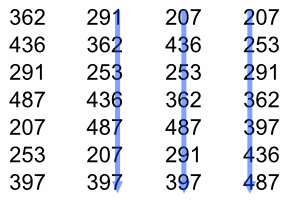

###**Explicación:**   
Como se explicó anteriormente se ordena por las partes menos importantes hasta las más significativas, en caso de trabajar con números, se parte por la unidad y se termina por la última cifra del mayor número.    

Para ordenar números, este algoritmo trabaja de esta forma:
- Se tiene un arreglo auxiliar de largo $10$ donde guardar temporalmente los números.
- Partiendo por la unidad, se empiezan a introducir los números en el auxiliar, utilizando primero la unidad como índice.
- Desde el arreglo auxiliar, se guardan nuevamente en el arreglo original, esto hace que los números esten ordenados por su unidad.
- Haciendo esto se obtiene que por cada cifra de los números, se vayan ordenando desde las partes de menor importancia, es decir, se ordenan las unidades, luego se ordenan las decenas, y así sucesivamente hasta terminar el proceso.

Para este ejemplo se tiene el arreglo con los números:  
$[362$, $436$, $291$, $487$, $207$, $253$ y $397]$.  

**Unidad**  
Se parte por la unidad, ya que es la parte del número que menos valor tiene a la hora de ordenar estos elementos, entonces se ordenarán desde la unidad 0 hasta la 9, obteniendo en el arreglo auxiliar:    
**Posición $1$ →** $291$  
**Posición $2$ →** $362$  
**Posición $3$ →** $253$   
**Posición $6$ →** $436$  
**Posición $7$ →** $487, 207, 397$    
**Resultado:**  
$[291, 362, 253, 436, 487, 207, 397]$     
Como se observa, los números estan ordenados por su unidad.

**Decima**  
Ahora se ordena por las cifras de la decena usando el mismo proceso que antes:  
**Posición $0$ →** $207$  
**Posición $3$ →** $436$  
**Posición $5$ →** $253$  
**Posición $6$ →** $362$  
**Posición $8$ →** $487$  
**Posición $9$ →** $291, 397$  
**Resultado:**  
$[207, 436, 253, 362, 487, 291, 397]$

**Centena**  
Por último, como el número más largo sólo tiene cifras hasta la centena, este será la última iteración en este ejemplo:  
**Posición $2$ →** $207, 253, 291$  
**Posición $3$ →** $362, 397$  
**Posición $4$ →** $436, 487$  
**Resultado:**  
$[207, 253, 291, 362, 397, 436, 487]$  

Tal y como se ve, usando RadixSort, se ha ordenado este arreglo.




#Implementación del Algoritmo

Para implementar RadixSort, utilizaremos también CountingSort para realizar los ordenamientos en las distintas iteraciones.

**Aclaración:** La siguiente implementación del algoritmo RadixSort sólo es funcional para arreglos con números naturales, es decir, números enteros mayores o iguales a $0$.


![image.png](https://www.researchgate.net/publication/220686480/figure/fig4/AS:667707569614851@1536205298801/Example-of-counting-sort.png)

###**CountingSort**
Este algoritmo es el encargado de ordenar los arreglos, y utiliza dos arreglos adicionales:

**Arreglo C**  
Guarda las frecuencias de los números del arreglo de entrada, y luego calcula las frecuencias acumuladas.  

**Arreglo B**  
Es donde se van guardando los elementos de manera ordenada, luego se pasan los números al arreglo de entrada.

In [23]:
def countingSort(A, k):
    global verbose
    sz = len(A)

    C = [0] * 10
    B = [0] * sz

    for i in range(sz):
        idx = A[i] // k
        C[idx%10] += 1

    for i in range(1, 10):
        C[i] += C[i-1]

    if verbose: print(colored("ArrayC","blue"),C,colored("\nArrayB","blue"),B)
    for i in range(sz-1, -1, -1):
        idx = A[i] // k
        B[C[idx%10]-1] = A[i]
        C[idx%10] -= 1
        if verbose: print(colored("\nArrayC","blue"),C,colored("\nArrayB","blue"),B,colored(f"\nInsertado:","cyan"),A[i])

    for i in range(sz):
      A[i] = B[i]

###**RadixSort**
Lo que hace RadixSort es encontrar $k$, donde $k$ es la cantidad de cifras del número más grande, para conocer la cantidad de veces que se llame a CountingSort, entregándole la cifra a ordenar.

In [5]:
def radixSort(A):
  global verbose
  mx = max(A)
  k = 1
  cifra = 1
  while mx // k > 0:
    if verbose: print(colored(f"\nCifras N°{cifra}","green"))
    countingSort(A, k)
    cifra += 1
    k *= 10
    if verbose: print(colored(f"\nResultado:","magenta"),A)

###**Main**

In [25]:
n = rd.randint(10,20)
A = rd.sample(range(10,200),n)

verbose = False

print(colored(f"Entrada:","red"),A)
radixSort(A)
print(colored(f"\nSalida: ","red"),A)

Entrada: [60, 77, 146, 196, 152, 103, 138, 108, 81, 57, 34, 20, 153, 93, 41]

Salida:  [20, 34, 41, 57, 60, 77, 81, 93, 103, 108, 138, 146, 152, 153, 196]


###**Ejemplo con _verbose = True_**


In [42]:
n = rd.randint(10,20)
A = rd.sample(range(0,200),n)
verbose = True
print(colored(f"Entrada:","red"),A)
radixSort(A)
print(colored(f"\nSalida: ","red"),A)

Entrada: [20, 68, 46, 87, 33, 196, 157, 62, 6, 175, 153, 171, 132, 30, 192, 5]

Cifras N°1
ArrayC [2, 3, 6, 8, 8, 10, 13, 15, 16, 16] 
ArrayB [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

ArrayC [2, 3, 6, 8, 8, 9, 13, 15, 16, 16] 
ArrayB [0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0] 
Insertado: 5

ArrayC [2, 3, 5, 8, 8, 9, 13, 15, 16, 16] 
ArrayB [0, 0, 0, 0, 0, 192, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0] 
Insertado: 192

ArrayC [1, 3, 5, 8, 8, 9, 13, 15, 16, 16] 
ArrayB [0, 30, 0, 0, 0, 192, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0] 
Insertado: 30

ArrayC [1, 3, 4, 8, 8, 9, 13, 15, 16, 16] 
ArrayB [0, 30, 0, 0, 132, 192, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0] 
Insertado: 132

ArrayC [1, 2, 4, 8, 8, 9, 13, 15, 16, 16] 
ArrayB [0, 30, 171, 0, 132, 192, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0] 
Insertado: 171

ArrayC [1, 2, 4, 7, 8, 9, 13, 15, 16, 16] 
ArrayB [0, 30, 171, 0, 132, 192, 0, 153, 0, 5, 0, 0, 0, 0, 0, 0] 
Insertado: 153

ArrayC [1, 2, 4, 7, 8, 8, 13, 15, 16, 16] 
ArrayB [0, 30, 171, 0, 132, 192, 0, 153, 175, 

#Prueba de Correctitud


Probaremos si el algoritmo **CountingSort** funciona correctamente, para esto utilizaremos inducción matemática.

Para llevar a cabo este método y saber si el algoritmo es correcto en arreglos de largo $n$, se necesita conocer que ocurre en dos casos específicos:
- **Caso Base:** Se debe conocer que ocurre al usar el algoritmo CountingSort en un arreglo de un solo elemento.
- **Caso General:** Para este caso se debe estudiar que ocurre al utilizar este algoritmo en arreglos de largo $m$, con $m < n$.

###**Caso Base**
En arreglos de largo $1$, CountingSort lo único que hará es devolver el mismo arreglo, ya que desde el inicio está ordenado.

###**Caso General**
Podemos percatarnos de que en la implementación de CountingSort desde RadixSort, $k$ se trabaja con valor $10$, por lo que $k$ es constante, es decir, que no varía en ningún momento de la ejecución.  
Con esto en mente, podemos afirmar que CountingSort siempre encontrará los índices de la posición correcta de cada número, esto se traduce a que siempre el algoritmo cumplirá su cometido, ordenando el arreglo entregado.

#Tiempo de ejecución

###**CountingSort**
Para empezar, estudiaremos el tiempo de ejecución de CountingSort. Este algoritmo se ejecuta ordenando arreglos de largo $n$, donde $k$ es el rango (diferencia entre el mínimo y máximo) de los números que se ordenarán.  
Sumando todos los procesos de los cicols iterativos, el algoritmo resulta en:
- $T(n) = k + n + (k-1) + n$ 
- $T(n) = 2n + 2k -1$

Como siempre hace lo mismo sin importar el estado del arreglo de entrada, no hay ni mejor caso, en esta situación, se eliminan las constantes, por lo que el tiempo de ejecución de CountingSort resulta en:
- $Θ(n + k)$

###**RadixSort**
RadixSort lo que hace es llamar repetidas veces a CountingSort, por lo que la complejidad temporal de este algoritmo es:
- $Θ(a(n+k))$

En este caso $a$ es la cantidad de dígitos que contiene el mayor número dentro del arreglo de entrada.  
Pero podemos darnos cuenta que RadixSort sólo ordena números por sus dígitos, es decir, que $k = 10$, pasaría a ser constante, es decir que el tiempo de ejecución final del algoritmo RadixSort es:
- $Θ(n \cdot k)$

Con $n$ la cantidad de elementos del arreglo, y $k$ con la cantidad de dígitos que contiene el mayor número dentro de este arreglo.

#Análisis y Experimentos

Construiremos y analizaremos los siguientes estudios, para poder resolver nuestas dudas sobre el algoritmo RadicSort, de esta manera podemos tomar un método más práctico para observar cómo se comporta este algoritmo y formar nuestras conclusiones.

A continuación se encuentran los códigos de los algoritmos a utilizar en los experimentos.

**BucketSort**

In [21]:
def bucketSort(A):
    B = []
    m = max(A)
    n = len(A)

    for i in range(n): B.append([])
    for i in A: B[int(i*(n-1)/m)].append(i)
    for i in range(n): B[i] = insertionSort(B[i])
          
    k = 0
    for i in B:
        for j in i:
            A[k] = j
            k += 1

def insertionSort(b):
    for i in range(1, len(b)):
        up = b[i]
        j = i - 1
        while j >= 0 and b[j] > up: 
            b[j + 1] = b[j]
            j -= 1
        b[j + 1] = up     
    return b 

###**Comparación con BucketSort**
Con los siguientes experimentos, podremos analizar la diferencia entre RadixSort y BucketSort en tiempos de ejecución. Notaremos cuál es el algoritmo

Se utilizarán arreglos de largo $n \in [5, 300]$, que contienen elementos $\in [0,1000]$

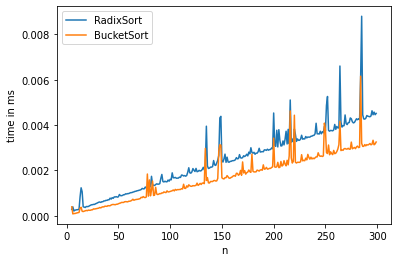

In [35]:
x=[]; y=[]; y2=[]

for n in range(5,300):

  a = rd.sample(range(0, 1000), n)
  b = copy(a)

  t = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({a})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import bucketSort", stmt=f"bucketSort({a})", repeat = 1, number = 10)
  x.append(n)
  y.append(t)
  y2.append(t2)


plt.plot(x,y)
plt.plot(x, y2)
plt.legend(["RadixSort", "BucketSort"])
plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

Se puede analizar que el algoritmo RadixSort toma un poco más de tiempo en ordenar los arreglos, pero la diferencia es leve. Esto es debido a que RadixSort se toma el tiempo de ordenar por los dígitos de los números, lo que se traduce a un ligero aumento de tiempo que se demora en ejecutar el algoritmo.  
También se observa que a pesar de que se ejecutan en tiempos diferentes, procesan usando el mismo método, esto se puede concluir debido a que los dos gráficos contienen los mismos picos y aumentos, tomando la misma forma.

###**Comparación con Casos Teóricos**
Se obervará como se comporta el algoritmo RadixSort, registrando cuanto tiempo demora en ejecutarse, y si se asemeja al tiempo esperado a los casos teóricos.

Para esto usaremos los siguiente:
- Se ejecutará múltiples veces RadixSort de forma experimental, con arreglos de largo $n$, con $n \in [5, 200]$, con números del $0$ al $1000$.
- Calculándolo matemáticamente, se graficará el caso esperado, es decir, el tiempo de ejecución teórico $Θ(n \cdot k)$.

Se analizarán los resultados para poder resolver esta duda.

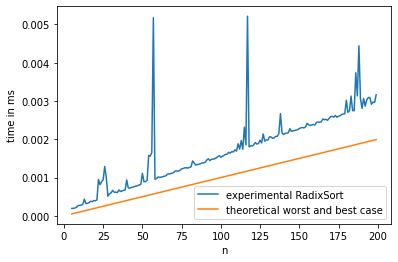

In [81]:
x=[]
y=[]
yt=[]

verbose = False
for n in range(5,200):
  a = rd.sample(range(0, 1000), n)
  yt.append(n/100000.0)

  radixSort(a)
  t = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({a})", repeat=1, number=10)

  y.append(t)
  x.append(n)

plt.plot(x,y)
plt.plot(x,yt)
plt.legend(["experimental RadixSort", "theoretical worst and best case"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

Se puede observar que los casos experimentales toman más tiempo de lo esperado, ya que el gráfico hecho con los cálculos de los casos teóricos tiene una pendiente ligeramente menor, por lo que crece más lento.  
Podemos concluir que mientras más grande sean los arreglos que se desean ordenar, mayor será la diferencia entre el caso experimental y el teórico, con el primero, sin tener en cuenta los picos que se pueden observar. 